In [13]:
import skimpy

In [34]:
import nfl_data_py as nfl

import pandas as pd
import numpy as np
from skimpy import skim
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.metrics import recall_score, precision_score, precision_recall_curve, f1_score, auc, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest

from keras.layers import Dense, ReLU, Normalization, Dropout
from keras.models import Sequential
from keras.activations import relu, sigmoid
from keras.losses import binary_crossentropy

from xgboost import XGBClassifier

import pickle
import requests
from bs4 import BeautifulSoup
import seaborn as sns

import time
import os

import warnings
import sys

warnings.filterwarnings("ignore")

sys.path.append("~/Desktop/MfL/")

In [12]:
rd1_qb_data = pd.read_csv('~/Desktop/MfL/first_round_qb_training_data.csv')

In [11]:
nfl.import_players()

,status,display_name,first_name,last_name,esb_id,gsis_id,birth_date,college_name,position_group,position,...,status_description_abbr,status_short_description,gsis_it_id,short_name,smart_id,headshot,draft_number,draftround,uniform_number,suffix
0,RET,'Omar Ellison,'Omar,Ellison,ELL711319,00-0004866,1971-10-08,None,WR,WR,...,None,None,NaN,None,3200454c-4c71-1319-728e-d49d3d236f8f,None,NaN,NaN,None,None
1,ACT,A'Shawn Robinson,A'Shawn,Robinson,ROB367960,00-0032889,1995-03-21,Alabama,DL,DE,...,A01,Active,43335.0,A.Robinson,3200524f-4236-7960-bf20-bc060ac0f49c,https://static.www.nfl.com/image/upload/f_auto...,46.0,2.0,94,None
2,RES,A.J. Arcuri,A.J.,Arcuri,ARC716900,00-0037845,1997-08-13,Michigan State,OL,T,...,R23,Reserve/Future,54726.0,A.Arcuri,32004152-4371-6900-5185-8cdd66b2ad11,https://static.www.nfl.com/image/upload/f_auto...,261.0,7.0,61,None
3,ACT,A.J. Barner,A.J.,Barner,BAR235889,00-0039793,2002-05-03,Michigan,TE,TE,...,A01,Active,57242.0,A.Barner,32004241-5223-5889-95d9-0ba3aeeb36ed,https://static.www.nfl.com/image/upload/f_auto...,121.0,4.0,88,None
4,RES,A.J. Bouye,Arlandus,Bouye,BOU651714,00-0030228,1991-08-16,Central Florida,DB,CB,...,R01,R/Injured,40688.0,A.Bouye,3200424f-5565-1714-cb38-07c822111a12,https://static.www.nfl.com/image/private/f_aut...,NaN,NaN,24,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20749,CUT,Zuri Henry,Zuri,Henry,HEN713594,00-0039689,2000-04-12,Texas-El Paso,OL,T,...,W03,Waivers/No Rec.,57839.0,Z.Henry,32004845-4e71-3594-d6f6-5f3aaca3acfc,None,NaN,NaN,65,None
20750,RET,Zuriel Smith,Zuriel,Smith,SMI828252,00-0022024,1980-01-15,None,WR,WR,...,None,None,NaN,None,3200534d-4982-8252-c800-85b370612021,None,NaN,NaN,None,None
20751,CUT,Zurlon Tipton,Zurlon,Tipton,TIP645432,00-0030855,1989-04-27,Central Michigan,RB,RB,...,A01,Active,41693.0,None,32005449-5064-5432-923a-94c7fae9b469,https://static.www.nfl.com/image/private/f_aut...,NaN,NaN,None,None
20752,DEV,Zyon Gilbert,Zyon,Gilbert,GIL144859,00-0037373,1999-02-04,Florida Atlantic,DB,CB,...,P02,Prac Sq.; Inj,54958.0,Z.Gilbert,32004749-4c14-4859-6e4a-327bb4fcec5a,https://static.www.nfl.com/image/upload/f_auto...,NaN,NaN,42,None


In [14]:
rd1_qb_data.columns

Index(['player', 'season', 'round', 'pick', 'team', 'age', 'college',
       'power_5', 'seasons', 'G', 'Cmp', 'Att', 'Cmp%', 'Yds', 'TD', 'TD%',
       'Int', 'Int%', 'Y/A', 'AY/A', 'Y/C', 'Y/G', 'Rate', 'successful'],
      dtype='object')

In [38]:
import pandas 

In [43]:
pd.read_csv('DATASETS/first_round_qb_training_data.csv')

,player,season,round,pick,team,age,college,power_5,seasons,G,...,TD,TD%,Int,Int%,Y/A,AY/A,Y/C,Y/G,Rate,successful
0,Sam Bradford,2010,1,1,LA,22.0,Oklahoma,False,3.0,31.0,...,88.0,9.9,16.0,1.8,9.4,10.57,13.9,271.1,175.6,False
1,Tim Tebow,2010,1,25,DEN,23.0,Florida,True,4.0,55.0,...,88.0,8.8,16.0,1.6,9.3,10.38,14.0,168.8,170.8,False
2,Jake Locker,2011,1,8,TEN,23.0,Washington,True,4.0,40.0,...,53.0,4.6,35.0,3.1,6.7,6.21,12.3,191.0,119.1,False
3,Blaine Gabbert,2011,1,10,JAX,21.0,Missouri,True,3.0,31.0,...,40.0,4.3,18.0,1.9,7.3,7.30,12.0,220.1,132.6,False
4,Christian Ponder,2011,1,12,MIN,23.0,Florida St.,True,4.0,35.0,...,49.0,5.1,30.0,3.1,7.1,6.74,11.5,196.3,132.1,False
5,Andrew Luck,2012,1,1,IND,22.0,Stanford,True,3.0,38.0,...,82.0,7.7,22.0,2.1,8.9,9.47,13.2,248.2,162.8,True
6,Robert Griffin III,2012,1,2,WAS,22.0,Baylor,True,4.0,41.0,...,78.0,6.5,17.0,1.4,8.7,9.36,13.0,252.8,158.9,False
7,Ryan Tannehill,2012,1,8,MIA,24.0,Texas A&M,True,4.0,50.0,...,42.0,5.4,21.0,2.7,7.0,6.91,11.3,109.0,134.2,True
8,Brandon Weeden,2012,1,22,CLE,28.0,Oklahoma St.,True,4.0,30.0,...,75.0,6.8,27.0,2.4,8.4,8.65,12.1,308.7,157.6,False
9,EJ Manuel,2013,1,16,BUF,23.0,Florida St.,True,4.0,43.0,...,47.0,5.2,28.0,3.1,8.6,8.27,12.9,180.0,150.4,False


In [54]:
class BustModel:
    
    # charts here?
    # add player cleaning pipeline
    rd1_qb_data = pd.read_csv('DATASETS/first_round_qb_training_data.csv')
    rd1_qb_list = rd1_qb_data['player'].unique()
    valid_feature_list = rd1_qb_data.columns
    response_distribution = rd1_qb_data['successful'].value_counts()

    def __init__(self, 
                 save_model=False, 
                 model_list=['lr', 'svm', 'rf'],
                 feature_list=['G', 'Cmp', 'Att', 'Cmp%', 'Yds', 'TD', 'TD%',
                            'Int', 'Int%', 'Y/A', 'AY/A', 'Y/C', 'Y/G', 'Rate'],
                 trial_id= 'abc',
                 scale_data=False):

        self.save_model = save_model
        self.model_list = model_list
        self.feature_list = feature_list
        self.trial_id = trial_id
        self.scale_data = scale_data

    def summarize_rd1_qbs(self):
        skim(BustModel.rd1_qb_data)

    def load_data(self):
        
        df = BustModel.rd1_qb_data
        df = df[df['AY/A'].isna() == False]
        
        self.df = df

        mappings = {False:0, True:1}
        df['successful'] = df['successful'].apply(lambda bool: mappings[bool])
        df['power_5'] = df['power_5'].apply(lambda bool: mappings[bool])

        df_final = df[self.feature_list]

        if self.scale_data:
            scaler = StandardScaler()
            scaled_df = scaler.fit_transform(df_final)

            df_final = pd.DataFrame()

            for idx in range(len(self.feature_list)):
                df_final[self.feature_list[idx]] = scaled_df[:,idx]
        
        df_final = pd.concat([df_final.reset_index(), df['successful'].reset_index()],axis=1).drop('index', axis=1)
        
        self.cleaned_features = df_final
    
    def create_training_data(self):
        
        self.load_data()
        
        if self.feature_list == 'all':
            X_train, X_test, y_train, y_test = train_test_split(self.df.drop('successful', axis=1), self.df['successful'], test_size=.3, stratify=self.df['successful'])
        else:
            X_train, X_test, y_train, y_test = train_test_split(self.df[self.feature_list], self.df['successful'], test_size=.3, stratify=self.df['successful'])

        self.X_train, self.X_test, self.y_train, self.y_test = X_train, X_test, y_train, y_test

    def metrics(self, y_true, y_preds, y_probs):
        accuracy = accuracy_score(y_true, y_preds)
        roc = roc_auc_score(y_true, y_probs)
        f1 = f1_score(y_true, y_probs)

        error_dict = {
            'accuracy': accuracy,
            'roc_auc': roc,
            'f1': f1
        }

        return error_dict

    def run_model(self, model, **kwargs):

        self.create_training_data()
        X_train, X_test, y_train, y_test = self.X_train, self.X_test, self.y_train, self.y_test 

        df_features = pd.concat([X_train, X_test])
        df_responses = pd.concat([y_train, y_test])

        k_strat = StratifiedKFold(n_splits=4, shuffle=False)
        folds = k_strat.split(df_features, df_responses)
        
        X_trains = []
        X_tests = []
        y_tests = []
        y_trains = []
        y_preds_full = []
        y_probs = []

        for train, test in folds:
            
            X_train, X_test = df_features.iloc[train], df_features.iloc[test]
            y_train, y_test = df_responses.values[train], df_responses.values[test]
            
            if model == 'svm':
                model = SVC(probability=True, **kwargs)
            
            if model == 'lr':
                model = LogisticRegression(**kwargs)

            if model == 'rf':
                model = RandomForestClassifier(**kwargs)
            
            model.fit(X_train, y_train)
            y_preds = model.predict(X_test)
            y_preds = (y_preds >= 5).astype(int)
            y_proba = model.predict_proba(X_test)

            X_trains.extend(X_train)
            X_tests.extend(X_test)
            y_trains.extend(y_train)
            y_tests.extend(y_test)
            y_preds_full.extend(y_preds)
            y_probs.extend(y_proba)

        result_dict = {
            'model': model,
            'X_train': X_trains, 
            'X_test': X_tests,
            'y_train': y_trains,
            'y_tests': y_tests,
            'y_preds': y_preds,
            'y_probs': y_probs
        }

        return result_dict

    def run_SVM(self, kernel='rbf', save_SVM=False):

        self.create_training_data()
        X_train, X_test, y_train, y_test = self.X_train, self.X_test, self.y_train, self.y_test 

        df_features = pd.concat([X_train, X_test])
        df_responses = pd.concat([y_train, y_test])

        k_strat = StratifiedKFold(n_splits=4, shuffle=False)
        folds = k_strat.split(df_features, df_responses)
        
        X_trains = []
        X_tests = []
        y_tests = []
        y_trains = []
        y_preds = []
        y_probs = []
        
        for train, test in folds:
            
            X_train, X_test = df_features.iloc[train], df_features.iloc[test]
            y_train, y_test = df_responses.values[train], df_responses.values[test]
            
            model = SVC(kernel=kernel, probability=True)
            
            model.fit(X_train, y_train)
            y_preds = model.predict(X_test)
            y_proba = model.predict_proba(X_test)

            X_trains.extend(X_train)
            X_tests.extend(X_test)
            y_trains.extend()
            y_tests.extend(y_test)

        model.fit(df_features, df_responses)

        self.SVM_model = model

        result_dict = {
            'model': model,
            'X_train': X_trains, 
            'X_test': X_tests,
            'y_train': y_trains,
            'y_tests': y_tests,
            'y_preds': y_preds,
            'y_probs': y_probs
        }

        return 'SVM: SUCCESS'
    
    def run_RF(self):

        self.create_training_data()
        X_train, X_test, y_train, y_test = self.X_train, self.X_test, self.y_train, self.y_test 

        df_features = pd.concat([X_train, X_test])
        df_responses = pd.concat([y_train, y_test])

        k_strat = StratifiedKFold(n_splits=5, shuffle=False)
        folds = k_strat.split(df_features, df_responses)
        
        acc = []
        roc = []
        
        actuals = []
        preds = []
        probs = []
        
        for train, test in folds:
            
            X_train, X_test = df_features.iloc[train], df_features.iloc[test]
            y_train, y_test = df_responses.values[train], df_responses.values[test]
            
            model = RandomForestClassifier()
            
            model.fit(X_train, y_train)
            y_preds = model.predict(X_test)
            y_preds = (y_preds >= 5).astype(int)
            y_proba = model.predict_proba(X_test)

            actuals.extend(y_test)
            preds.extend(y_preds)
            probs.extend(y_proba[:,1])

            acc.append(accuracy_score(y_test, y_preds))
            roc.append(roc_auc_score(y_test, y_proba[:,1]))
        
        print(f'Accuracy: {np.average(acc)}, ROC: {np.average(roc)}')

        self.RF_acc = acc

        acc = np.average(acc)
        auc = np.average(roc)

        return (actuals, preds, probs)
    
    def run_LR(self):
        
        self.create_training_data()
        X_train, X_test, y_train, y_test = self.X_train, self.X_test, self.y_train, self.y_test 
        
        df_features = pd.concat([X_train, X_test])
        df_responses = pd.concat([y_train, y_test])

        k_strat = StratifiedKFold(n_splits=5, shuffle=False)
        folds = k_strat.split(df_features, df_responses)
        
        acc = []
        roc = []
        
        for train, test in folds:
            
            X_train, X_test = df_features.iloc[train], df_features.iloc[test]
            y_train, y_test = df_responses.values[train], df_responses.values[test]
            
            model = LogisticRegression()
            
            model.fit(X_train, y_train)
            y_preds = model.predict(X_test)
            y_preds = (y_preds >= 5).astype(int)
            y_proba = model.predict_proba(X_test)

            acc.append(accuracy_score(y_test, y_preds))
            roc.append(roc_auc_score(y_test, y_proba[:,1]))
        
        print(f'Accuracy: {np.average(acc)}, ROC: {np.average(roc)}')

        return 'SUCCESS:'
    

    def run_sim(self):
        self.model_dict = {}

        print("Running sim...\n")
        for model in self.model_list:
            self.model_dict[model] = self.run_model(model)
        
        print("...simulation complete")


    # this needs to be fixed asap this needs to be fixed
    def predict_player(self, player_name='Caleb Williams', use_model='best'):
        raw_data['pick'] = 1
        raw_data['power_5'] = 1

        with open('models/SVM_model_3.pkl', 'rb') as file_path:
            model = pickle.load(file_path)

        predict_sample = [int(raw_data['G'].values[0]), int(raw_data['TD'].values[0]), int(raw_data['pick'].values[0]), int(raw_data['Int'].values[0]), int(raw_data['power_5'].values[0]), int(raw_data['seasons'].values[0])]
        print(predict_sample)
        sample = model.predict(np.array(predict_sample).reshape(1,-1))
        prob = model.predict_proba(np.array(predict_sample).reshape(1,-1))

        return sample, prob

    # fix to include qb names
    def preview_feature_set(self):
        return self.load_data()

In [ ]:
def predict_out_sample_player_test_new(player_name):

    #feature_subset=['G', 'TD', 'pick', 'Int', 'power_5']
    #feature_subset=['G', 'TD', 'pick', 'Int', 'power_5', 'seasons']
    # testing for Caleb Williams / Drake Maye
    raw_data['pick'] = 1
    raw_data['power_5'] = 1

    with open('models/SVM_model_3.pkl', 'rb') as file_path:
        model = pickle.load(file_path)

    predict_sample = [int(raw_data['G'].values[0]), int(raw_data['TD'].values[0]), int(raw_data['pick'].values[0]), int(raw_data['Int'].values[0]), int(raw_data['power_5'].values[0]), int(raw_data['seasons'].values[0])]
    print(predict_sample)
    sample = model.predict(np.array(predict_sample).reshape(1,-1))
    prob = model.predict_proba(np.array(predict_sample).reshape(1,-1))
    
    return sample, prob

In [55]:
nfl_model = BustModel(scale_data=False)

In [56]:
nfl_model.run_model_simulation()

Running sim...

...simulation complete


In [58]:
nfl_model.model_dict['lr']

{'model': LogisticRegression(),
 'X_train': ['G',
  'Cmp',
  'Att',
  'Cmp%',
  'Yds',
  'TD',
  'TD%',
  'Int',
  'Int%',
  'Y/A',
  'AY/A',
  'Y/C',
  'Y/G',
  'Rate',
  'G',
  'Cmp',
  'Att',
  'Cmp%',
  'Yds',
  'TD',
  'TD%',
  'Int',
  'Int%',
  'Y/A',
  'AY/A',
  'Y/C',
  'Y/G',
  'Rate',
  'G',
  'Cmp',
  'Att',
  'Cmp%',
  'Yds',
  'TD',
  'TD%',
  'Int',
  'Int%',
  'Y/A',
  'AY/A',
  'Y/C',
  'Y/G',
  'Rate',
  'G',
  'Cmp',
  'Att',
  'Cmp%',
  'Yds',
  'TD',
  'TD%',
  'Int',
  'Int%',
  'Y/A',
  'AY/A',
  'Y/C',
  'Y/G',
  'Rate'],
 'X_test': ['G',
  'Cmp',
  'Att',
  'Cmp%',
  'Yds',
  'TD',
  'TD%',
  'Int',
  'Int%',
  'Y/A',
  'AY/A',
  'Y/C',
  'Y/G',
  'Rate',
  'G',
  'Cmp',
  'Att',
  'Cmp%',
  'Yds',
  'TD',
  'TD%',
  'Int',
  'Int%',
  'Y/A',
  'AY/A',
  'Y/C',
  'Y/G',
  'Rate',
  'G',
  'Cmp',
  'Att',
  'Cmp%',
  'Yds',
  'TD',
  'TD%',
  'Int',
  'Int%',
  'Y/A',
  'AY/A',
  'Y/C',
  'Y/G',
  'Rate',
  'G',
  'Cmp',
  'Att',
  'Cmp%',
  'Yds',
  'TD',
  'TD

In [31]:
args = nfl_model.run_RF()

Accuracy: 0.5535714285714285, ROC: 0.5800000000000001


In [26]:
args[2]

[array([0.4, 0.6]),
 array([0.19, 0.81]),
 array([0.63, 0.37]),
 array([0.53, 0.47]),
 array([0.3, 0.7]),
 array([0.83, 0.17]),
 array([0.67, 0.33]),
 array([0.39, 0.61]),
 array([0.67, 0.33]),
 array([0.13, 0.87]),
 array([0.9, 0.1]),
 array([0.63, 0.37]),
 array([0.63, 0.37]),
 array([0.83, 0.17]),
 array([0.84, 0.16]),
 array([0.3, 0.7]),
 array([0.45, 0.55]),
 array([0.68, 0.32]),
 array([0.67, 0.33]),
 array([0.46, 0.54]),
 array([0.56, 0.44]),
 array([0.89, 0.11]),
 array([0.45, 0.55]),
 array([0.47, 0.53]),
 array([0.95, 0.05]),
 array([0.19, 0.81]),
 array([0.57, 0.43]),
 array([0.41, 0.59]),
 array([0.5, 0.5]),
 array([0.31, 0.69]),
 array([0.34, 0.66]),
 array([0.64, 0.36]),
 array([0.33, 0.67]),
 array([0.54, 0.46]),
 array([0.46, 0.54]),
 array([0.48, 0.52]),
 array([0.24, 0.76]),
 array([0.57, 0.43])]

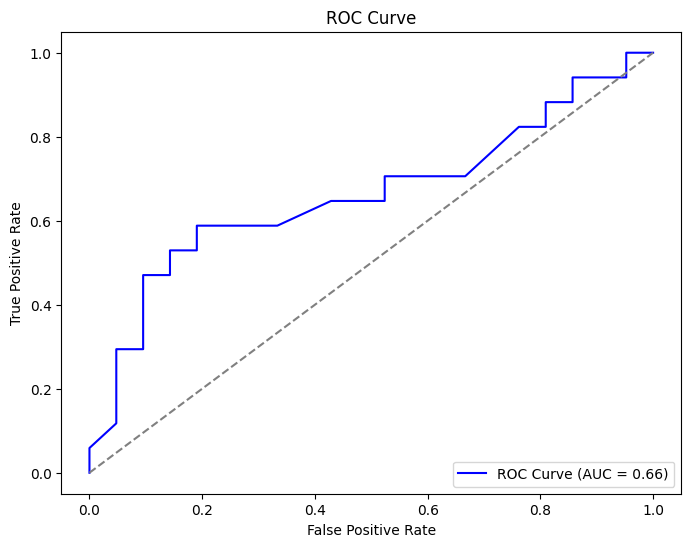

In [37]:
# Compute ROC curve
fpr, tpr, _ = roc_curve(args[0], args[2])

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal random-guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [36]:
plt.scatter(roc_curve(args[0], args[2]))

TypeError: scatter() missing 1 required positional argument: 'y'

In [10]:
nfl_model.run_model_simulation()

Accuracy: 0.5535714285714285, ROC: 0.6733333333333333
Accuracy: 0.6555555555555554, ROC: 0.7841666666666667
Accuracy: 0.5535714285714285, ROC: 0.665
Running sim...



['SUCCESS:', 'SVM: SUCCESS', 'SUCCESS: Random Forest']